<a href="https://colab.research.google.com/github/CogGal/CogGal/blob/master/StatMethodsPsy20_Lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1 - What is a distribution and how can we characterize it?

In [ ]:
#@title Intro
# Needs
# 1. Hieght distribution file
# 2. Height distribution file of basketball players
# 3. Siblings distribution file
# 4. Income salary distribution file (Israel and USA)
# 5. Twitter popularity distribution file
# 6. Age at death distribution file
# 7. Height distribution of all population file (show how the variance of samples converges to 1/n-1 of the true variance)

In [ ]:
#@title Imports
import pandas as pd
import seaborn as sns
import numpy as np
import random
import io
import matplotlib.pyplot as plt
from scipy import stats
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')


sns.set(style="white", palette="muted", color_codes=True)
sns.set(rc={'figure.figsize':(10,10)});
sns.set_context("talk")

def plot_dist(dist, bins="auto", kde=False, fit="None", color="b", stat="density",height=8, aspect=1):
  #for frequency - set stat to "count"
  #aspect*height=width
  plt.figure(0)
  sns.displot(dist, kde=kde,bins=bins,stat=stat,color=color,height=height, aspect=aspect);
  if (fit=="Normal") & (stat=="density"):  
    d = stats.norm.fit(dist)
    mu = d[0]; sigma = d[1]
    x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 200) #limits of dist
    plt.plot(x, stats.norm.pdf(x, mu, sigma),color="black");
  elif (fit=="F") & (stat=="density"):  
    d = stats.f.fit(dist)
    dfn = d[0]; dfd = d[1]
    interval = stats.f.interval(.995,dfn,dfd) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.f.pdf(x, dfn, dfd),color="black");
  elif (fit=="gamma") & (stat=="density"):  
    d = stats.gamma.fit(dist)
    a = d[0]; loc = d[1]; scale = d[2]
    interval = stats.gamma.interval(.995,a,loc,scale) #limits of dist
    x = np.linspace(interval[0],interval[1], 200)
    plt.plot(x, stats.gamma.pdf(x, a, loc, scale),color="black");


In [ ]:
#@title Data imports
urlHeight='https://raw.githubusercontent.com/uvhart/StatPsyMethods/master/StatMethodsPsy-Lect1.csv'
data = pd.read_csv(urlHeight)

#Slide 1: We want to understand what happens in the world around us, but we cannot measure the entire world, we can only sample it. This brings uncertainty to our estimations. Statistics allows us to do that in an intelligent way.

## Which leads to the following question - How can we describe samples and what could they tell us about the world?

# Slide 2: Let's start by characterizing heights
## A simple way to characterizing heights is just to output all the values we measured. It will be exact but quite lengthy.

In [ ]:
#@title Heights of students in class

heightSim = data['Height']
sib = data['Siblings']
# heightSim= np.random.normal(175, 6, size=200)
# sibSim= np.random.normal(2, 0.5, size=200)
print(heightSim)

0      154.0
1      173.0
2      160.0
3      156.0
4      160.0
       ...  
136    162.0
137    165.0
138    160.0
139    163.0
140    165.0
Name: Height, Length: 141, dtype: float64


# Slide 3: How can we summarize this information?
## Usually we would want to visualize it and then focus on either the mean, the median, or different quantiles of the sample (a common one is the 95% range between 2.5%-97.5%)

## Question 1: What is one advantage of the median vs. the mean?
### A. The median is less affected by outliers, the mean is sensitive to outliers
### B. The median is always higher than the mean
### C. The mean is just mean
### D. The median is not dependent on the sample size

# Slide 4: What are the mean and median of the sample?

The mean height is: 166.8121
The median height is: 165.0


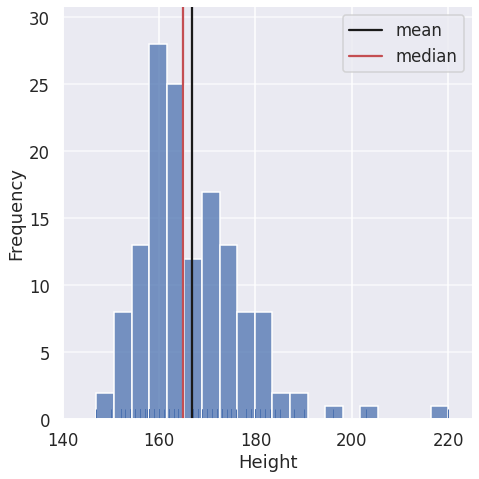

In [ ]:
#@title Heights distribution with mean and median
# The mean is the average of the sample (center of mass of the distribution)
meanHgt=np.mean(heightSim)
# The median is the 50 percentile (half the samples are lower, half the samples are higher)
mdnHgt=np.median(heightSim)
# The mode is the most frequent value in the sample
# modHgt=stats.mode(heightSim)

sns.displot(heightSim,bins=20, kde=False, rug=True, color="b", height=7)
print("The mean height is:",round(meanHgt,4))
print("The median height is:",round(mdnHgt,4))

plt.grid(axis='y', alpha=0.75);
plt.xlabel('Height');
plt.ylabel('Frequency');
plt.xlim([140,225])

plt.axvline(x=meanHgt, color='k', linestyle='-',label = "mean");
plt.axvline(x=mdnHgt, color='r', linestyle='-',label="median");
plt.legend();

# Slide 5: This is a **histogram**. The level of each range of height values tells us how frequent it is, and we can calculate the mean (vertical line in black) and the median (vertical line in red). We see that the two measures are quite close to one another. This comes about because the distribution of different values is **symmetric** - there's the same amount of lower values than the mean as the amount of higher values than the mean.

# Slide 6: Another way to draw a similar graph is by drawing the **probability density** which is what you get if you divide each bar by the bar width and the total number of values in the sample (shown below).

<Figure size 720x720 with 0 Axes>

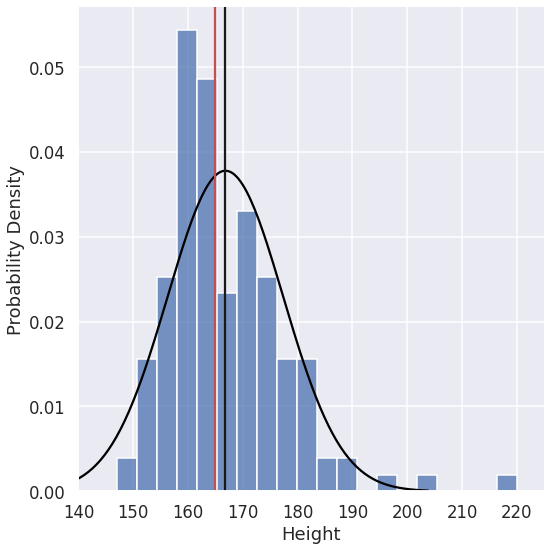

In [ ]:
#@title Probability density distribution - close to normal
# Show a line on the distribution we have with mean, median

plot_dist(heightSim,bins=20,kde=False,stat="density",fit="Normal",color="b");
plt.xlabel('Height');
plt.ylabel('Probability Density');
plt.xlim([140,225]);

plt.axvline(x=meanHgt, color='k', linestyle='-');
plt.axvline(x=mdnHgt, color='r', linestyle='-');

# Discuss the difference between mean and median 

# Slide 7: This is the **probability density** plot. It is identical in shape to the histogram, but the values on the y-axis (left axis) are different (normalized). Each bar now represents the probability that when you sample randomly from the population, you'll find this range of height values. Again shown are the mean height (vertical line in black) and the median height (vertical line in red). You can also see that the probability distribution is very close to a **Normal distribution** (black curve enveloping the bars).

# Slide 8: Distributions don't have to be symmetric

#Slide 9: Distributions can be right skewed (like income or facebook friends)
## In **right skewed** distributions, the mean is higher than the median. For **right skewed** distributions there's a risk that the mean is not a good measure because it is too much affected by some outlier high values (consider what happens if we want to calculate the mean income in class but Bill Gates decides to join as well).

<Figure size 720x720 with 0 Axes>

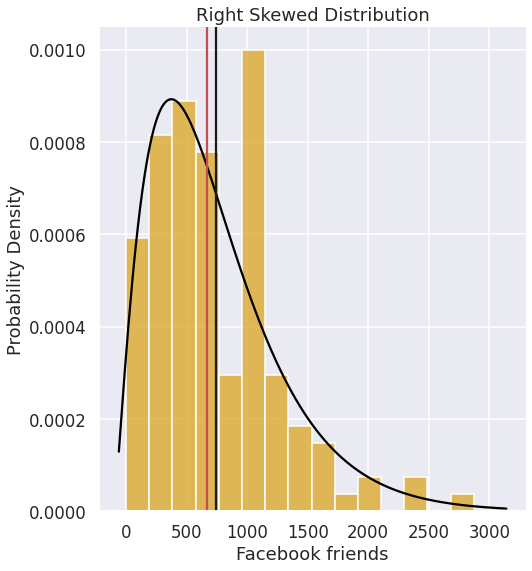

In [ ]:
#@title Right Skewed Distribution - Example
shape, scale = 2, 40.  # mean=4, std=2*sqrt(2)
Face = data['Facebook Friends']

meanFace=np.mean(Face)
mdnFace=np.median(Face)

plot_dist(Face,bins=15, color="goldenrod", fit="gamma")
plt.xlabel('Facebook friends')
plt.ylabel('Probability Density')
plt.title('Right Skewed Distribution')

plt.axvline(x=meanFace, color='k', linestyle='-');
plt.axvline(x=mdnFace, color='r', linestyle='-');

# Slide 10: Distributions can be left skewed (like people's age  at death)
## In **left skewed** distributions the mean will be lower than the median. For **left skewed** distributions there's a risk the mean is not a good measure because it is too much affected by some outlier low values (consider what happens if we want to calculate the mean age at death but include deaths at birth).

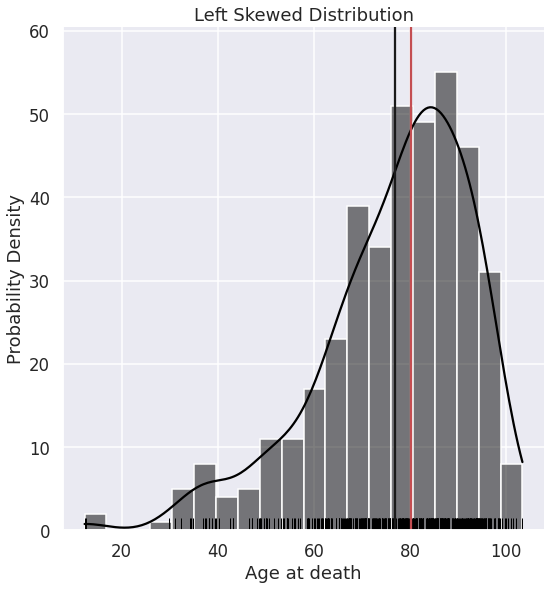

In [ ]:
#@title Left Skewed Distribution - Example
shape, scale = 3, 9.  # mean=4, std=2*sqrt(2)
np.random.seed(4)
DeathSim =  105 - np.random.gamma(shape, scale, 400)
DeathSim=DeathSim[DeathSim>0]
# incomeSim = pd.Series(incomeSim, name="Income")

meanDeath=np.mean(DeathSim)
mdnDeath=np.median(DeathSim)

sns.displot(DeathSim,bins=20, kde=True, rug=True, color='black', height=8);
plt.xlabel('Age at death')
plt.ylabel('Probability Density')
plt.title('Left Skewed Distribution')

plt.axvline(x=meanDeath, color='k', linestyle='-');
plt.axvline(x=mdnDeath, color='r', linestyle='-');

## Question 2: Out of the following distributions - which one would be left skewed ?
### A. Number of copies sold from a book
### B. Twitter followers
### C. An easy exam with a few students that didn't learn much
### D. Number of kids in a family in the US 

# Slide 11: Sample statistics and population statistics are not the same
## Always remember that samples are not the populations themselves, so the statistics we get from samples are only **approximating** the true values of their corresponding population statistics. What should we take care of in the sampling process?

#Slide 12: First and foremost, our sampling method needs to be unbiased, consistent, and reliable - what does it mean?

#Slide 13: Unbiased - means that the statistic of the sample should approximate the statistic of the population

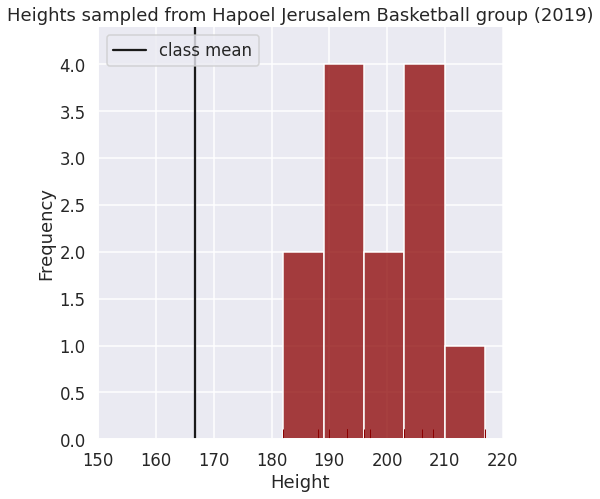

In [ ]:
#@title Biased sample of heights - Example #1
# Show a biased distribution of heights
Hapoel_Jerusalem= pd.DataFrame()
Hapoel_Jerusalem['name']= ('Daniel Rosenbaum','Tashawn Thomas','James Feldeine','Trent Lockett', 'JCovan Brown','Nimrod Levi', 'Suleiman Braimoh', 'Mindaugas Kupsas', 'Dvir Ringvald', 'Tamir Blatt','Idan Zalmanson', 'Isaiah Cousins', 'Bar Timor')
Hapoel_Jerusalem['height']= (193, 203, 193, 196, 188, 208, 203, 217, 197, 182, 206, 193, 190)

#print(Hapoel_Jerusalem.height)
sns.displot(Hapoel_Jerusalem.height, color = "darkred" , kde=False, rug=True, height=7);
plt.title("Heights sampled from Hapoel Jerusalem Basketball group (2019)")
plt.xlim(150, 220)
plt.xlabel('Height');
plt.ylabel('Frequency');
plt.axvline(x=meanHgt, color='k', linestyle='-', label="class mean");
plt.legend(loc=2);


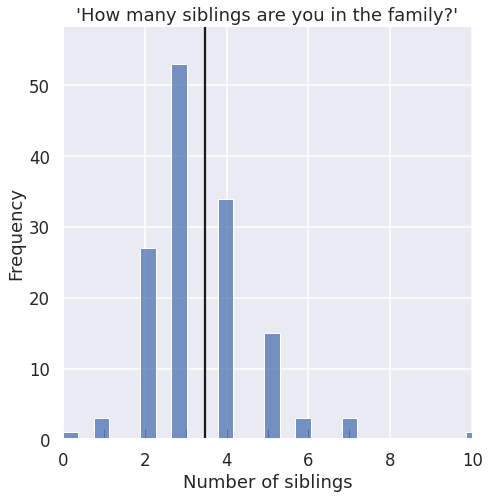

In [ ]:
#@title Biased sampling - Number of siblings distribution (Sampling by length)
#Show the distribution of siblings in the class
meanSib=np.mean(sib)
sns.displot(sib, kde=False, rug=True, height=7);

plt.xlim(0, 10)
plt.xlabel('Number of siblings');
plt.ylabel('Frequency');
plt.title("'How many siblings are you in the family?'")
plt.axvline(x=meanSib, color='k', linestyle='-');

#Slide 14: Reliable - means that the measuring device produces same results when measuring the same person

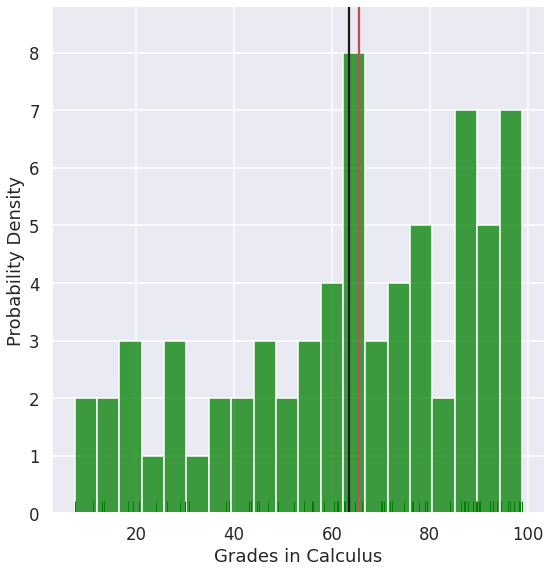

In [ ]:
#@title Unreliable sample - since the variance is so large, we might get very different results each time we sample the grades in class.
# Show a sample with high variance
CalcSim = [i for i in np.random.normal(80, 45, 100) if ((i<100) & (i>0))] 

sns.displot(CalcSim, bins=20,color="green", kde=False, rug=True, height=8);

plt.xlabel('Grades in Calculus');
plt.ylabel('Probability Density');

plt.axvline(x=np.mean(CalcSim), color='k', linestyle='-');
plt.axvline(x=np.median(CalcSim), color='r', linestyle='-');

## Question 3a - Is this sample biased? 
###  A. Yes
### B. No

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

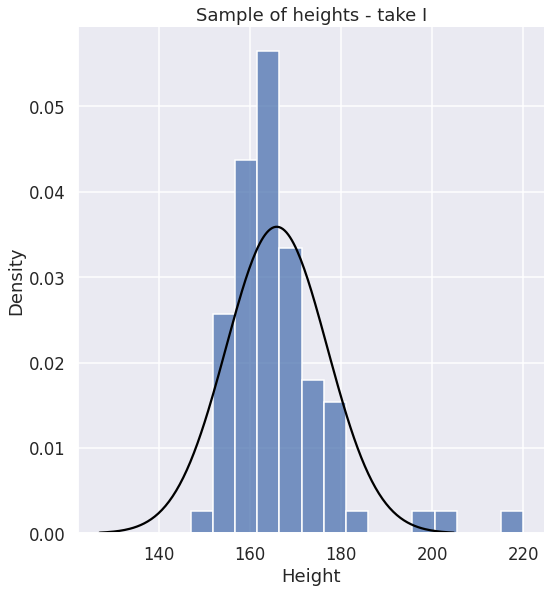

In [ ]:
#@title We sample the heights and get this result (see a graph below)
noise=70 #maximum noise in cm
reps=9000 # number of repeats
size=80 #sample size
plt.figure(1)
plot_dist(np.random.choice(heightSim,size), kde=False, fit="Normal")
#sns.distplot();
plt.xlabel("Height")
plt.title("Sample of heights - take I");



<Figure size 720x720 with 0 Axes>

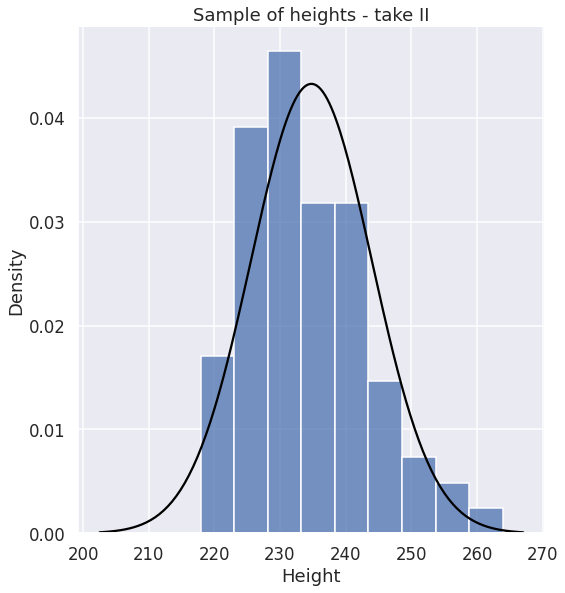

In [ ]:
#@title Then we sample again and get a completely different result (see graph below and compare with the one above)
noise_shift=np.random.uniform(0,noise,1)
heightNoise=np.random.choice(heightSim,size)+noise_shift
sampleDistNoise = []
plot_dist(heightNoise, kde=False, fit="Normal")
plt.xlabel("Height")

plt.title("Sample of heights - take II");


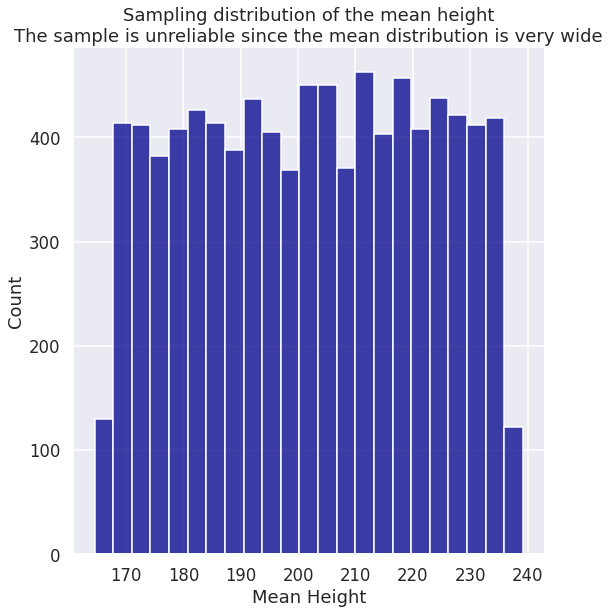

In [ ]:
#@title When we plot the means we got from many samples (like the two above) - we see a wide distribution of the possible means. This suggests that the sampling isn't reliable.
for i in range(reps):
    noise_shift=np.random.uniform(0,noise,1)
    heightNoise=heightSim+noise_shift
    sampleDistNoise.append(np.mean(np.random.choice(heightNoise,size)))

sns.displot(sampleDistNoise, kde=False,color="darkblue", height=8);
plt.xlabel("Mean Height")

plt.title("Sampling distribution of the mean height\nThe sample is unreliable since the mean distribution is very wide");

# Slide 15: Let's assume we decided to use the mean as the representing number for the sample (the mean will be our statistic). How reliable is the mean we got?

## To that aim, we calculate the Standard Error (SE) or the %95 Confidence Interval

# slide 16: Let's see first, what happens when we sample once from a distribution

In [ ]:
#@title One sample from heights distribution
def changeSampleSize(sample_size=18):
  np.random.seed(4)
  SampledHeight=random.choices(heightSim, k=sample_size)
  meanHgt=np.mean(SampledHeight)
  print("Sample size:", sample_size)
  print("Sample mean:", meanHgt)
  print("Sample variance:", np.var(SampledHeight))


  sns.displot(SampledHeight,bins=10, kde=False, rug=True, height=8);

  plt.xlim(150, 200)
  plt.xlabel('Height');
  plt.ylabel('Frequency');
  plt.axvline(x=meanHgt, color='k', linestyle='-');

_=interact(changeSampleSize,sample_size=(2,100))

interactive(children=(IntSlider(value=18, description='sample_size', min=2), Output()), _dom_classes=('widget-…

# Slide 17: Each time that we sample, the mean will fall in a different place, and the variance will be different.
## To account for this variation, what we will usually do is repeat the process of sampling many times. Let's see how much the mean changes when we repeat the sampling process 1000 times:

In [ ]:
#@title Bootstrap distribution of the mean height
def mean_boot(sample_size=15):  
  
  num_replications=1000;
  np.random.seed(1)
  print(f"Sample size is {sample_size}")

  meanHeight = np.zeros(num_replications)
  for i in range(num_replications):
      SampledHeight=random.choices(heightSim, k=sample_size)
      meanHeight[i]=np.mean(SampledHeight)

  meanMeanHieght=np.mean(meanHeight)
  left2p5 = np.around(np.percentile(meanHeight, 2.5, interpolation='higher'),decimals=2)
  right97p5 = np.around(np.percentile(meanHeight, 97.5, interpolation='higher'),decimals=2)
  SEmean=np.around(np.std(meanHeight),decimals=2)
  SEmean2=np.around(np.std(heightSim)/np.sqrt(sample_size),decimals=2)


  sns.displot(meanHeight, kde=False, rug=True, height=8, aspect=1.5);

  plt.xlim(155, 185)
  plt.xlabel('Mean Height');
  plt.ylabel('Probability Density');

  plt.axvline(x=meanMeanHieght, color='k', linestyle='-', label="Mean of bootstrap distribution");
  plt.axvline(x=left2p5, color='g', linestyle='-',label= "95% confidence interval");
  plt.axvline(x=right97p5, color='g', linestyle='-');   
  plt.axvline(x=meanMeanHieght+SEmean, color='r', linestyle='-',label= "Mean +- 1 Standard error");
  plt.axvline(x=meanMeanHieght-SEmean, color='r', linestyle='-');    
  plt.legend()
  print('The mean of the true sample is: ',np.around(np.mean(heightSim),decimals=2))
  print('The mean of "Mean Height" is: ',np.around(meanMeanHieght,decimals=2))
  print('The Standard Error of "Mean Height" is: ',SEmean, ' (by data - calculating the standard deviation of the mean distribution)')
  print('The Standard Error of "Mean Height" is: ',SEmean2, ' (by formula - calculating the standard deviation of the original sample and dividing by sqrt(N))')
  print('The 95% CI is: ',left2p5, ' - ', right97p5)

_=interact(mean_boot,sample_size=(5,140,5))

interactive(children=(IntSlider(value=15, description='sample_size', max=140, min=5, step=5), Output()), _dom_…

# Slide 18: In this case we see that the distribution of the means of the many repititions of sampling is quite steady and the distribution is narrow. This can be quantified by either the **Standard Error** (shown in red in the plot) or the **95% Confidence Interval** (shown in green in the plot).

## The **Standard Error** is defined as the **standard deviation of the distribution of the statistic**. If the population distribution is Normal, it can also be calculated as the standard deviation of the original sample divided by the square root of the number of samples (**SE = STD(original sample)/sqrt(N)**).

## The **95% Confidence Interval** is the **region between the 2.5 percentile and the 97.5 percentile** of the distributions of the statistic (in our case here it was the distribution of the mean across many samples).

# Slide 19: Not always the mean is a good measure. When that happens, usually the distribution of the means will vary widely

## For example, in the case of **skewed population distributions** (like income or age at death)

<Figure size 720x720 with 0 Axes>

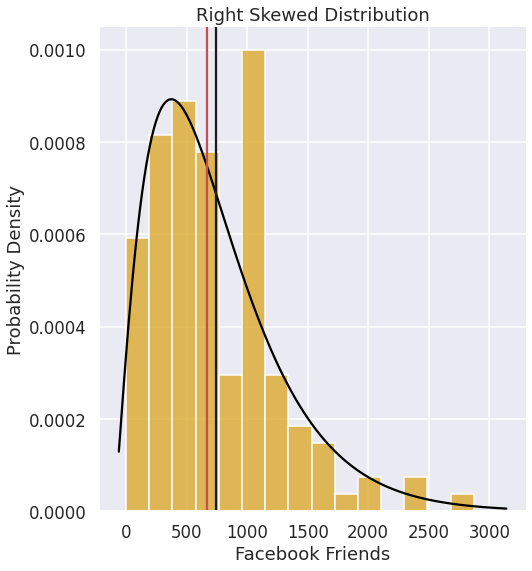

In [ ]:
#@title 
plot_dist(Face,bins=15, color="goldenrod", fit="gamma")
plt.xlabel('Facebook Friends')
plt.ylabel('Probability Density')
plt.title('Right Skewed Distribution')

plt.axvline(x=meanFace, color='k', linestyle='-');
plt.axvline(x=mdnFace, color='r', linestyle='-');

### Or when the population distribution is **bi-modal**

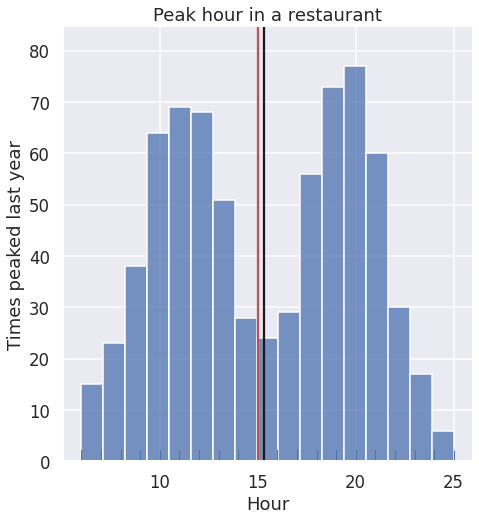

In [ ]:
#@title 
PeakEve = (np.random.normal(20, 1.9, 364)).astype(int)
PeakMorn = (np.random.normal(11.5, 1.9, 364)).astype(int)
PeakHour = np.concatenate([PeakEve, PeakMorn])


sns.displot(PeakHour,bins=17, kde=False, rug=True, height=7);
plt.xlabel('Hour')
plt.ylabel('Times peaked last year')
plt.title('Peak hour in a restaurant')

plt.axvline(x=np.mean(PeakHour), color='k', linestyle='-');
plt.axvline(x=np.median(PeakHour), color='r', linestyle='-');

# Slide 20: Another hallmark of problematic mean is when the **standard deviation of the sample is equivalent to the mean**. This indicates that the mean is **not** representing well the distribution.

# Slide 21: A good statistic needs to be:
## 1. Unbiased
## 2. Effective (Low variance as possible)
## 3. Consistent (The bigger is the sample size - the smaller is the standard error)

## Another important note: For consistent statistics, the bigger the sample, the bigger is the chance it will be closer to the actual parameter value in the population.

# Slide 22: How close is the variance of the sample compared to the variance of the population?

## Question 4 - What happens to the mean variance of the sample compared to the variance of the population as we increase the number of observations in our sample?
### A. Nothing changes. The variance of the sample stays the same, the mean changes.
### B. The mean variance of the sample will become lower and lower until it reaches the population's variance.
### C. The mean variance of the sample will grow higher and higher until it reaches the population's variance.
### D. It's complicated. Sometimes the mean variance of the sample grows and sometimes it decreases, but I'm sure it will reach the population variance at the end. 

In [ ]:
#@title Sample variance is a biased estimator to the actual variance
def var_boot(sample_size=15):
  num_replications=1000;
  np.random.seed(1)
  varHeight = np.zeros(num_replications)
  for i in range(num_replications):
      SampledHeight=random.choices(heightSim, k=sample_size)
      varHeight[i]=np.var(SampledHeight)

  meanVarHieght=np.mean(varHeight)
  left2p5 = np.around(np.percentile(varHeight, 2.5, interpolation='higher'),decimals=2)
  right97p5 = np.around(np.percentile(varHeight, 97.5, interpolation='higher'),decimals=2)
  SEmean=np.around(np.std(varHeight),decimals=2)

  plot_dist(varHeight,kde=False, height=8, aspect=1.5, fit="gamma")

  plt.xlabel('Variance of Height');
  plt.ylabel('Probability Density');
  plt.title("Bootstrap distribution of variance")
  plt.axvline(x=meanVarHieght, color='k', linestyle='--', label = "Mean variance of many samples");
  plt.axvline(x=np.around(np.var(heightSim)), color='r', linestyle='-', label= "population variance");
  plt.axvline(x=left2p5, color='g', linestyle='-', label="95% confidence interval");
  plt.axvline(x=right97p5, color='g', linestyle='-');    

  plt.legend()
  print('The variance of the population is: ',np.around(np.var(heightSim),decimals=2))
  print('The mean of "Variance of Height" is: ',np.around(meanVarHieght,decimals=2))
  print('The Standard Error of "Variance Height" is: ',SEmean, ' (by calculating the standard deviation of the variance distribution)')
  print('The 95% CI is: ',left2p5, ' - ', right97p5)

_=interact(var_boot,sample_size=(5,140,5))

interactive(children=(IntSlider(value=15, description='sample_size', max=140, min=5, step=5), Output()), _dom_…

Mean of the mean height in a random sample from the population: 166.8154
Variance of the mean height in a random sample from the population: 21.8081


<Figure size 720x720 with 0 Axes>

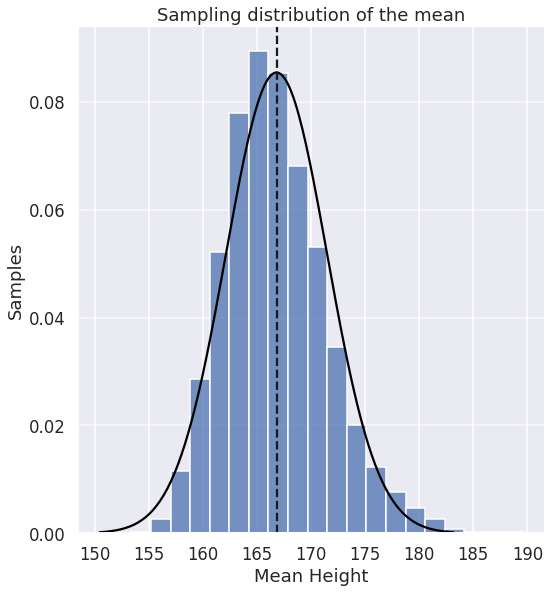

In [ ]:
#@title The mean of the sample is a reliable and unbiased estimator of the population mean
# Insert a simulation of sampling from a distribution (5 times, 100 times, 10,000 times), show below the distribution of the sample, the mean 
# and the variance (see http://onlinestatbook.com/stat_sim/sampling_dist/)

sample_size = 5;
n_samples=10000;
meanHgtS = np.zeros(n_samples)

for i in range(n_samples):
  heightS = random.choices(heightSim, k=sample_size)
  meanHgtS[i]=np.mean(heightS)
  
print("Mean of the mean height in a random sample from the population:",round(meanHgtS.mean(),4))  
print("Variance of the mean height in a random sample from the population:",round(meanHgtS.var(),4)) #Note that this is not the variance of the heights! its the variance of the means of sampling from the distribution of heights 

plot_dist(meanHgtS,bins=20, kde=False, color="b", fit="Normal")


plt.grid(axis='y', alpha=0.75);
plt.xlabel('Mean Height');
plt.ylabel('Samples');
plt.title('Sampling distribution of the mean');
plt.axvline(x=meanHgtS.mean(), color='k', linestyle='--');




#Extras

## Sampling by length - 
### Take the case of waiting for the bus - we go to people and ask them how long did they wait for the bus, is this sampling by length or not?

Actual difference between arrivals: 9.99998796015184
mean waiting time: 9.943870303634478


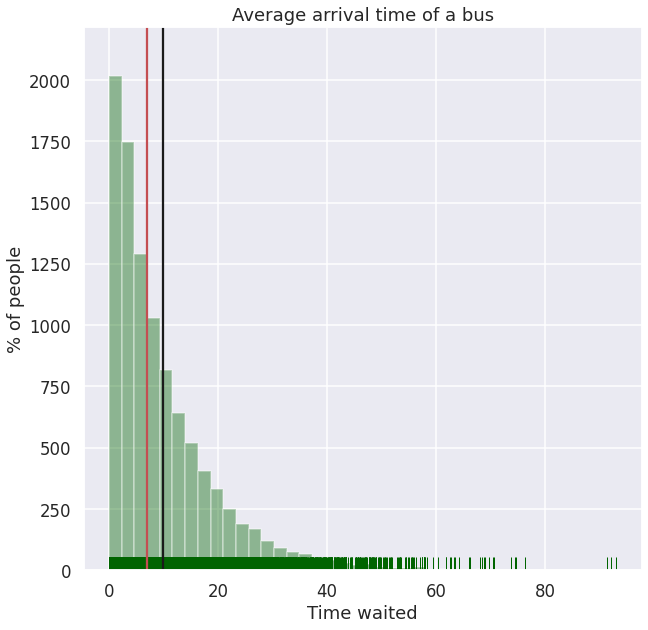

In [ ]:
#@title Time waiting for the bus - people should wait around five minutes (between 0-10 minutes), but longer periods are oversampled
# Show examples of different kinds of biased and unbiased distributions
# Time waiting for the bus - longer periods are oversampled

def simulate_wait_times(arrival_times,
                        rseed=8675909,  #random seed
                        n_passengers=10000):
    rand = np.random.RandomState(rseed)
    
    arrival_times = np.asarray(arrival_times)
    passenger_times = arrival_times.max() * rand.rand(n_passengers)

    # find the index of the next bus for each simulated passenger
    i = np.searchsorted(arrival_times, passenger_times, side='right')

    return arrival_times[i] - passenger_times
  
N = 1000000  # number of buses
tau = 10  # average minutes between arrivals

rand = np.random.RandomState(42)  # universal random seed
bus_arrival_times = N * tau * np.sort(rand.rand(N))
print("Actual difference between arrivals:",np.diff(bus_arrival_times).mean())

##It takes ten minutes to a bus to arrive, so if I get there at a random time I expect to wait about half the time in average - 5 muinutes

wait_times = simulate_wait_times(bus_arrival_times)

sns.distplot(wait_times, bins=40,color="darkgreen", kde=False, rug=True);

plt.xlabel('Time waited');
plt.ylabel('% of people');
plt.title('Average arrival time of a bus')

print("mean waiting time:", wait_times.mean())

plt.axvline(x=np.mean(wait_times), color='k', linestyle='-');
plt.axvline(x=np.median(wait_times), color='r', linestyle='-');

## Question -  Is this sample reliable?
### A. Yes
### B. No